In [1]:
# PCA with images

# References:
# https://github.com/NourozR/Reconstruction-and-Compression-of-Color-Images/blob/master/image_reconstruction_using_PCA.py
# https://glowingpython.blogspot.com/2011/07/pca-and-image-compression-with-numpy.html

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

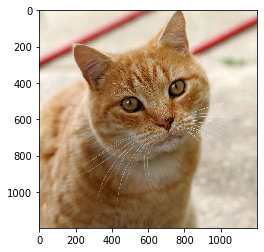

In [6]:
img = cv2.imread('Cat03.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

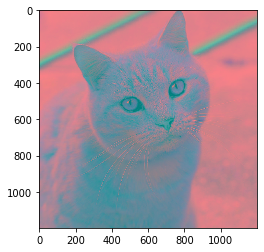

In [10]:
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
plt.imshow(img_lab)

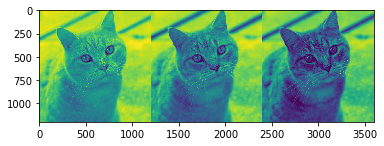

In [102]:
plt.imshow(np.hstack([img[:,:,0], img[:,:,1], img[:,:,2]]))

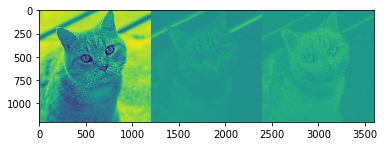

In [25]:
plt.imshow(np.hstack([img_lab[:,:,0], img_lab[:,:,1], img_lab[:,:,2]]))

In [29]:
from numpy import linalg as LA

In [81]:
np.min(img_lab)

0

In [195]:
def pca(A, n_comp=None):
    # mean corrected
    A_mc = (A - np.mean(A, axis=0)).T
    
    # cov matrix -- symmetric
    cov_mtx = np.cov(A_mc)
    
    # compute eig vals
    evals, evecs = LA.eigh(cov_mtx)

    # reverse sort by val
    idx = np.argsort(evals)[::-1]
        
    evals = evals[idx] # 1-d
    evecs = evecs[:, idx] # 2-d
    
    if n_comp and n_comp < A.shape[1]:
        evals = evals[range(n_comp)]
        evecs = evecs[:, range(n_comp)]

    return evals, evecs
    
def reconstruct_data(A, evecs, n_comp=None):
    """
    evecs: eigenvectors sorted by eigenvalues in desc order
    """
    if n_comp and n_comp < evecs.shape[1]:
        evecs = evecs[:, range(n_comp)]
    
    A_mean = np.mean(A, axis=0)
    A_mean_corrected = (A - A_mean).T
    A_proj = np.dot(evecs.T, A_mean_corrected)
    A_recon = np.dot(evecs, A_proj).T + A_mean

    return A_recon

def convert_to_uint8(arr):
    arr = arr.astype(np.int)
    arr = np.clip(arr, 0, 255)
    arr = arr.astype(np.uint8)
    
    return arr

In [199]:
ncomp = 50

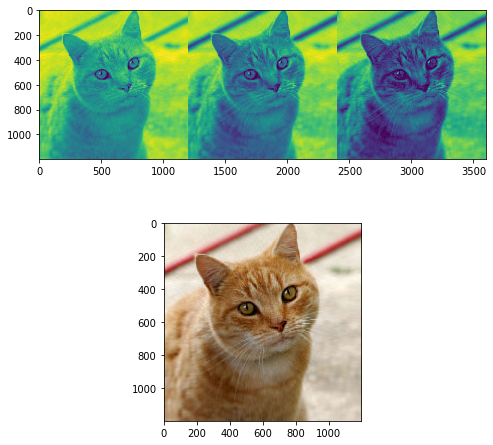

In [200]:
rgb_r = img[:,:,0]
rgb_g = img[:,:,1]
rgb_b = img[:,:,2]

rgb_r_pca = convert_to_uint8(reconstruct_data(rgb_r, pca(rgb_r, ncomp)[1]))
rgb_g_pca = convert_to_uint8(reconstruct_data(rgb_g, pca(rgb_g, ncomp)[1]))
rgb_b_pca = convert_to_uint8(reconstruct_data(rgb_b, pca(rgb_b, ncomp)[1]))
rgb_rgb_pca = np.dstack((rgb_r_pca, rgb_g_pca, rgb_b_pca))

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].imshow(np.hstack([rgb_r_pca, rgb_g_pca, rgb_b_pca]))
axes[1].imshow(rgb_rgb_pca)

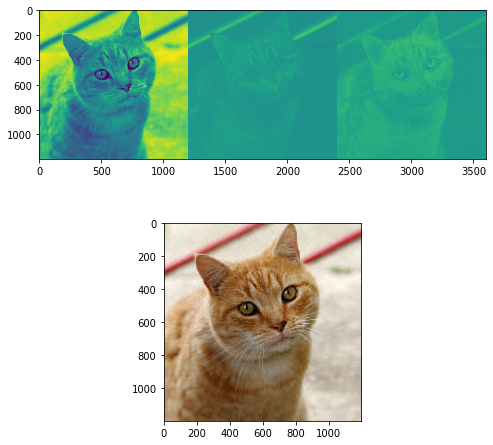

In [201]:
lab_l = img_lab[:,:,0]
lab_a = img_lab[:,:,1]
lab_b = img_lab[:,:,2]

lab_l_pca = convert_to_uint8(reconstruct_data(lab_l, pca(lab_l, ncomp)[1]))
lab_a_pca = convert_to_uint8(reconstruct_data(lab_a, pca(lab_a, ncomp)[1]))
lab_b_pca = convert_to_uint8(reconstruct_data(lab_b, pca(lab_b, ncomp)[1]))
lab_lab_pca = np.dstack((lab_l_pca, lab_a_pca, lab_b_pca))

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].imshow(np.hstack([lab_l_pca, lab_a_pca, lab_b_pca]))
axes[1].imshow(cv2.cvtColor(lab_lab_pca, cv2.COLOR_LAB2RGB))